# **Title: Project 1 Graph Visualization**


**Centrality Measures**
---



**Submitted by:** Umais Siddiqui, Banu Boopalan

**Date:** March 3rd, 2025

**Course:** Data Science – DATA620

# **Project Overview**

In this project, we will construct a graph based on the Wikipedia API for the topic "Artificial Intelligence." We will explore the individuals associated with this topic, leveraging a Natural Language Processing (NLP) engine to determine their genders. By analyzing the connections of these individuals, we will identify other people linked to Artificial Intelligence and assess the influence of key contributors in the field.

Additionally, we will conduct basic graph analysis, such as calculating the number of nodes, edges, and graph density, while showcasing some example nodes and edges. Lastly, we will compute centrality measures such as "Degree Centrality" and "Eigenvector Centrality" for the entire graph, as well as for specific categories including the topic, individual, and gender. These centrality measures will then be compared to gain insights into the influence of various entities within the Artificial Intelligence domain.

# **Wikipedia API and Data Source**


The data for this analysis is sourced from Wikipedia pages using the Wikipedia API. This API allows users to fetch content, extract hyperlinks, and analyze relationships between people in a specific topic like for example in our project we chose "Artificial Intelligence". The extracted data is then processed and structured for network analysis to identify patterns in interconnectivity and information flow.

# **STEP 1: Data Extraction and Preperation **

## - Wikipedia API setup
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia(user_agent="DataScienceProject/1.0", language='en')

## - The topic to analyze
topic_title = "Artificial Intelligence"

page = wiki_wiki.page(title)

## - Extract the Links and set up a list to store person data

 links = list(page.links.keys())
    person_data = []
## - Using Spacy 
spacy: Natural Language Processing (NLP) library used to detect names of people from text.

import spacy

## - Load the English NLP model
nlp = spacy.load("en_core_web_sm")

## - Initialize gender detector once
gender_detector = gender.Detector()

def detect_gender(name):
    """Detects the gender of a person based on their first name."""
    name_parts = name.split()
    first_name = name_parts[0] if name_parts else name
    gender_result = gender_detector.get_gender(first_name)
    
    if gender_result in ['male', 'mostly_male']:
        return 'Male'
    elif gender_result in ['female', 'mostly_female']:
        return 'Female'
    else:
        return 'Unknown'
## - How Extraction and NLP Work Together 

def process_page(title):

    """Fetches links for a Wikipedia page and determines the gender of identified persons."""
    start_time = time.time()
    page = wiki_wiki.page(title)
    if not page.exists():
        print(f"Page '{title}' does not exist.")
        return []

    links = list(page.links.keys())
    person_data = []
    
    for link in links:
        if is_person_name(link):
            gender_result = detect_gender(link)
            person_data.append((link, gender_result))
    
    print(f"Found {len(person_data)} persons in the page: {title} - Time Taken: {time.time() - start_time:.2f} sec")
    return person_data


## - Process the main topic and save results
main_csv_filename = f"{topic_title.replace(' ', '_')}_Linked_People.csv"

if not os.path.exists(main_csv_filename):
    print("Processing main topic page...")
    person_list = process_page(topic_title)
    save_to_csv(main_csv_filename, person_list)
else:
    print(f"{main_csv_filename} already exists. Skipping topic processing.")
## - Process each persons Wikipedia Page and Save to CSV 

for index, person_name in enumerate(original_people, start=1):
    person_filename = os.path.join(output_folder, f"{person_name.replace(' ', '_')}.csv")

    if not os.path.exists(person_filename):
        print(f"({index}/{len(original_people)}) Processing {person_name}...")
        start_time = time.time()
        person_data = process_page(person_name)
        save_to_csv(person_filename, person_data)
        print(f"Finished processing {person_name} - Time Taken: {time.time() - start_time:.2f} sec")
    else:
        print(f"({index}/{len(original_people)}) {person_name} already processed. Skipping.")

        def save_to_csv(filepath, person_data):
    """Saves identified names and genders to a CSV file."""
    with open(filepath, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Name", "Gender"])
        writer.writerows(person_data)
    print(f"Data saved to {filepath}")


        
## - Constructing the Graph from the CSV

print("Building the graph...")
G = nx.DiGraph()

### - Add the root topic node

G.add_node(topic_title, type="Topic")

### - Connect the main topic to all identified people

for person_name in original_people:

    gender = person_gender_map.get(person_name, "Unknown")
    G.add_node(person_name, type="Person", gender=gender)
    G.add_edge(topic_title, person_name)  # Edge from root to person

### - Establish connections between people


print("Adding connections between people...")

for person_name in original_people:
    person_filename = os.path.join(output_folder, f"{person_name.replace(' ', '_')}.csv")

    if os.path.exists(person_filename):
        with open(person_filename, mode='r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header row
            
            for row in reader:
                if row:
                    linked_person = row[0].strip()
                    linked_gender = row[1].strip()

                    if linked_person:
                        if linked_person in original_people:
                            # If linked person is in original list, make a bidirectional edge
                            G.add_edge(person_name, linked_person)
                            G.add_edge(linked_person, person_name)
                        else:
                            # If not in the original list, create a one-directional edge
                            G.add_node(linked_person, type="Person", gender=linked_gender)
                            G.add_edge(person_name, linked_person)

### - Save the Graph

graph_filename = f"{topic_title.replace(' ', '_')}_Graph.graphml"

nx.write_graphml(G, graph_filename)

# ** STEP 2: Data Exploration and Basic Analysis**

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
# Load the Graph
graph_filename = "Artificial_Intelligence_Graph.graphml"
G = nx.read_graphml(graph_filename)

# Display Basic Info
print(f"\033[1mGraph Loaded: {graph_filename}\033[0m")
print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")
print(f"Graph Density: {nx.density(G):.4f}")

# Convert to DataFrame for easy analysis
nodes_df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
edges_df = pd.DataFrame(list(G.edges()), columns=['Source', 'Target'])

# Display first few rows of nodes and edges using tabulate
print("\n\033[1mSample Nodes:\033[0m")
print(tabulate(nodes_df.head(), headers='keys', tablefmt='grid'))

print("\n\033[1mSample Edges:\033[0m")
print(tabulate(edges_df.head(), headers='keys', tablefmt='grid'))





Graph Loaded: Artificial_Intelligence_Graph.graphml
Total Nodes: 16633
Total Edges: 41933
Graph Density: 0.0002

Sample Nodes:
+-------------------------+--------+----------+
|                         | type   | gender   |
+=========================+========+==========+
| Artificial Intelligence | Topic  | nan      |
+-------------------------+--------+----------+
| Valentin Lapa           | Person | Male     |
+-------------------------+--------+----------+
| Anthropomorphise        | Person | Unknown  |
+-------------------------+--------+----------+
| Alan Turing             | Person | Male     |
+-------------------------+--------+----------+
| Peter Cathcart Wason    | Person | Male     |
+-------------------------+--------+----------+

Sample Edges:
+----+-------------------------+----------------------+
|    | Source                  | Target               |
+====+=========================+======================+
|  0 | Artificial Intelligence | Valentin Lapa        |
+----+----

# **STEP 3: Centrality Measures Calculation**

In [32]:

# Compute Degree Centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Display top 10 most connected nodes (Degree Centrality)
top_10_degree = sorted_degree[:10]
degree_rows = []
for name, score in top_10_degree:
    degree_rows.append([name, f"{score:.4f}"])

# Compute Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Display top 10 nodes with highest eigenvector centrality
top_10_eigenvector = sorted_eigenvector[:10]
eigenvector_rows = []
for name, score in top_10_eigenvector:
    eigenvector_rows.append([name, f"{score:.4f}"])

# Print Degree Centrality Table
print("\n\033[1mTop 10 Most Connected Nodes (Degree Centrality):\033[0m")
print(tabulate(degree_rows, headers=["Node", "Degree Centrality"], tablefmt="grid"))

# Print Eigenvector Centrality Table
print("\n\033[1mTop 10 Nodes by Eigenvector Centrality:\033[0m")
print(tabulate(eigenvector_rows, headers=["Node", "Eigenvector Centrality"], tablefmt="grid"))


Top 10 Most Connected Nodes (Degree Centrality):
+------------------------------------+---------------------+
| Node                               |   Degree Centrality |
+====================================+=====================+
| Thomas Aquinas                     |              0.0699 |
+------------------------------------+---------------------+
| David Hume                         |              0.0673 |
+------------------------------------+---------------------+
| Noam Chomsky                       |              0.0578 |
+------------------------------------+---------------------+
| Herbert A. Simon                   |              0.0571 |
+------------------------------------+---------------------+
| Bertrand Russell                   |              0.0542 |
+------------------------------------+---------------------+
| Bill Gates                         |              0.0484 |
+------------------------------------+---------------------+
| Claude Shannon                   

# **STEP 4: Centrality Measures By Category**

In [33]:

# Compare Centrality Measures across Categorical Groups
# Group nodes by their 'type' (Person, Topic, etc.) and 'gender'
category_groups = nodes_df.groupby('type')
gender_groups = nodes_df.groupby('gender')

# Centrality Measures by 'type' (Category)
print("\n\033[1mCentrality Measures by 'type' (Category):\033[0m")
for category, group in category_groups:
    print(f"\n\033[1mCategory: {category}\033[0m")  # Bold category name
    
    # Get the centrality values for nodes in this category
    nodes_in_category = group.index
    degree_category = {node: degree_centrality[node] for node in nodes_in_category}
    eigenvector_category = {node: eigenvector_centrality[node] for node in nodes_in_category}
    
    # Prepare rows for Degree Centrality table
    degree_rows_category = []
    for node, score in sorted(degree_category.items(), key=lambda x: x[1], reverse=True)[:5]:
        degree_rows_category.append([node, f"{score:.4f}"])
    
    # Prepare rows for Eigenvector Centrality table
    eigenvector_rows_category = []
    for node, score in sorted(eigenvector_category.items(), key=lambda x: x[1], reverse=True)[:5]:
        eigenvector_rows_category.append([node, f"{score:.4f}"])
    
    # Print Degree Centrality table
    print("\n\033[1mDegree Centrality (Top 5):\033[0m")
    print(tabulate(degree_rows_category, headers=["Node", "Degree Centrality"], tablefmt="grid"))
    
    # Print Eigenvector Centrality table
    print("\n\033[1mEigenvector Centrality (Top 5):\033[0m")
    print(tabulate(eigenvector_rows_category, headers=["Node", "Eigenvector Centrality"], tablefmt="grid"))

# Centrality Measures by 'gender'
print("\n\033[1mCentrality Measures by 'gender':\033[0m")
for gender, group in gender_groups:
    print(f"\n\033[1mGender: {gender}\033[0m")  # Bold gender name
    
    # Get the centrality values for nodes in this gender group
    nodes_in_gender = group.index
    degree_gender = {node: degree_centrality[node] for node in nodes_in_gender}
    eigenvector_gender = {node: eigenvector_centrality[node] for node in nodes_in_gender}
    
    # Prepare rows for Degree Centrality table
    degree_rows_gender = []
    for node, score in sorted(degree_gender.items(), key=lambda x: x[1], reverse=True)[:5]:
        degree_rows_gender.append([node, f"{score:.4f}"])
    
    # Prepare rows for Eigenvector Centrality table
    eigenvector_rows_gender = []
    for node, score in sorted(eigenvector_gender.items(), key=lambda x: x[1], reverse=True)[:5]:
        eigenvector_rows_gender.append([node, f"{score:.4f}"])
    
    # Print Degree Centrality table
    print("\nDegree Centrality (Top 5):")
    print(tabulate(degree_rows_gender, headers=["Node", "Degree Centrality"], tablefmt="grid"))
    
    # Print Eigenvector Centrality table
    print("\nEigenvector Centrality (Top 5):")
    print(tabulate(eigenvector_rows_gender, headers=["Node", "Eigenvector Centrality"], tablefmt="grid"))



Centrality Measures by 'type' (Category):

Category: Person

Degree Centrality (Top 5):
+------------------+---------------------+
| Node             |   Degree Centrality |
+==================+=====================+
| Thomas Aquinas   |              0.0699 |
+------------------+---------------------+
| David Hume       |              0.0673 |
+------------------+---------------------+
| Noam Chomsky     |              0.0578 |
+------------------+---------------------+
| Herbert A. Simon |              0.0571 |
+------------------+---------------------+
| Bertrand Russell |              0.0542 |
+------------------+---------------------+

Eigenvector Centrality (Top 5):
+------------------+--------------------------+
| Node             |   Eigenvector Centrality |
+==================+==========================+
| Niklas Luhmann   |                   0.1323 |
+------------------+--------------------------+
| Francisco Varela |                   0.131  |
+------------------+-----------

# **STEP 5: Snowball Sampling**

In [34]:
# Snowball Sampling Function
def snowball_sampling(G, seed_nodes, num_layers=2):
    sampled_nodes = set(seed_nodes)
    for _ in range(num_layers):
        new_nodes = set()
        for node in sampled_nodes:
            neighbors = set(G.neighbors(node))
            new_nodes.update(neighbors)
        sampled_nodes.update(new_nodes)
    return G.subgraph(sampled_nodes)

# Extract top 10 most connected nodes
seed_nodes = [node for node, _ in top_10_degree]

# Apply snowball sampling
sampled_subgraph = snowball_sampling(G, seed_nodes, num_layers=2)

# Compute Degree Centrality for the sampled subgraph
subgraph_degree_centrality = nx.degree_centrality(sampled_subgraph)
sorted_subgraph_degree = sorted(subgraph_degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Display top 10 most connected nodes in the subgraph
print("\nTop 10 Most Connected Nodes in Sampled Subgraph:")
subgraph_rows = []

# Sort nodes by degree centrality and format them into rows
for name, score in sorted_subgraph_degree[:10]:
    subgraph_rows.append([name, f"{score:.4f}"])

# Print the table using tabulate
print(tabulate(subgraph_rows, headers=["Node", "Degree Centrality"], tablefmt="grid"))


Top 10 Most Connected Nodes in Sampled Subgraph:
+------------------------------------+---------------------+
| Node                               |   Degree Centrality |
+====================================+=====================+
| Thomas Aquinas                     |              0.0879 |
+------------------------------------+---------------------+
| David Hume                         |              0.0845 |
+------------------------------------+---------------------+
| Noam Chomsky                       |              0.0727 |
+------------------------------------+---------------------+
| Herbert A. Simon                   |              0.0718 |
+------------------------------------+---------------------+
| Bertrand Russell                   |              0.0681 |
+------------------------------------+---------------------+
| Bill Gates                         |              0.0608 |
+------------------------------------+---------------------+
| Claude Shannon                   

# **STEP 6: Plotting the Top 10 Nodes in the Subgraph**

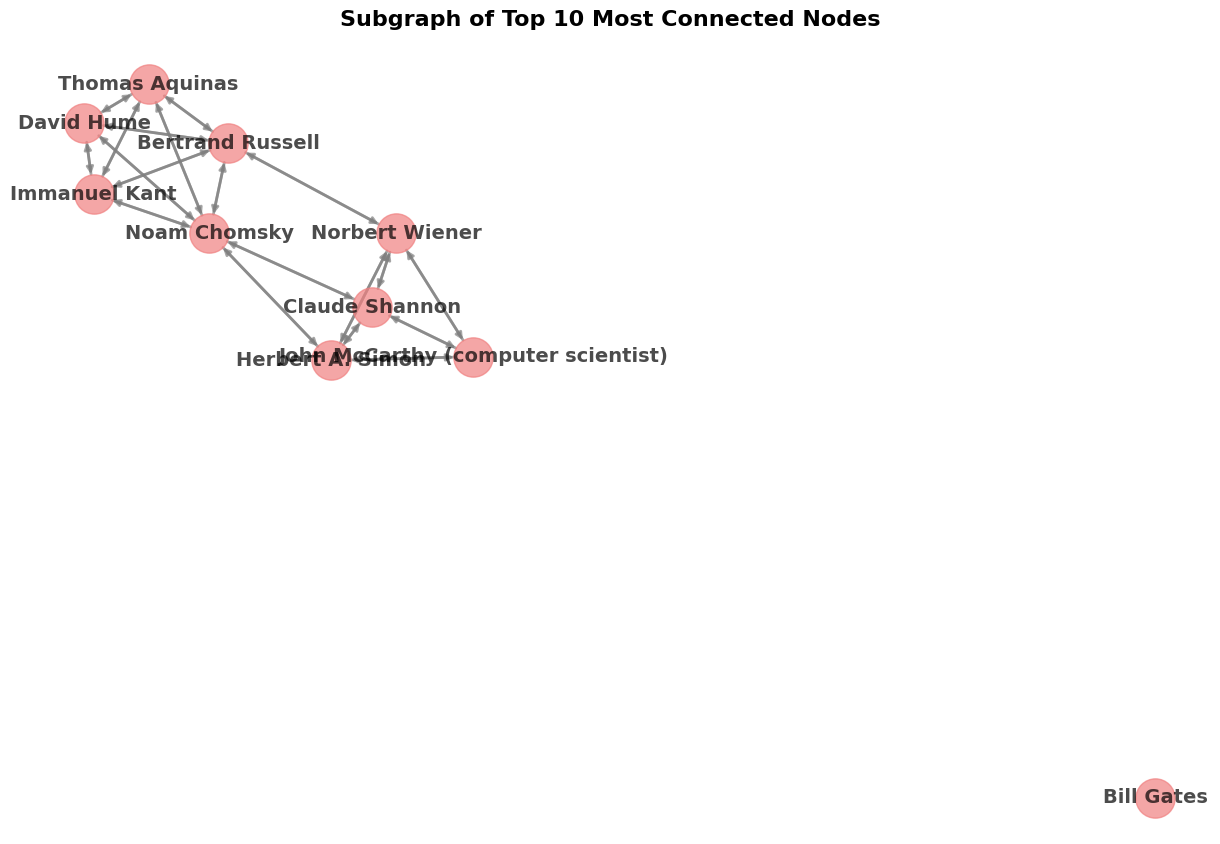

In [35]:


# Limit the graph to the top 10 most connected nodes and their neighbors
top_nodes = [node for node, _ in sorted_degree[:10]]  # Top 10 nodes by degree centrality
subgraph = G.subgraph(top_nodes)
plt.figure(figsize=(12, 8))

# Adjust the spring layout with a larger `k` to spread the nodes more
pos = nx.spring_layout(subgraph, seed=42, k=0.3)  # Increase k to spread nodes more

# Draw the graph with enhanced aesthetics
nx.draw(subgraph, pos, with_labels=True,
        node_size=800,  # Larger node size
        node_color='lightcoral',  # Softer color for nodes
        font_size=14,  # Larger font for readability
        font_weight='bold',  # Bold labels
        edge_color="gray",  # Neutral edge color
        width=2,  # Edge thickness
        alpha=0.7,  # Transparency for edges
        font_color='black')  # Color of the font

# Customize the plot
plt.title("Subgraph of Top 10 Most Connected Nodes", fontsize=16, fontweight='bold')

# Optionally adjust the aspect ratio or axis limits for better presentation
plt.axis('off')  # Turn off the axis

# Display the plot
plt.show()


# **Conclusion**

## 1. Centrality Measures by "Type":

### Degree Centrality (Top 5):

Persons tend to dominate the top degree centrality rankings, indicating that individuals are more highly connected in this graph.
This suggests that the network is focused on people (historical figures, scientists, etc.) who are highly influential in the field of artificial intelligence, philosophy, or related domains.
Artificial Intelligence (the main topic) has a lower degree centrality score, indicating that while it is a key concept, it's not as directly connected to other nodes as some individual people are.
Eigenvector Centrality (Top 5):

Persons once again dominate in eigenvector centrality, meaning that these individuals are not only highly connected but also connected to other influential nodes. For example, people like Niklas Luhmann and Norbert Wiener have high scores, suggesting they are central to important clusters in the network.
Artificial Intelligence, however, has an eigenvector centrality of 0, meaning it's not closely connected to other highly influential nodes, despite being a central topic in the network. This may indicate that the node representing "Artificial Intelligence" doesn't bridge influential individuals or communities.
Conclusion:

Persons in the graph are much more central (in both degree and eigenvector centrality) than the core "Topic" (Artificial Intelligence), suggesting that individual contributors have a larger impact on the network's structure. "Artificial Intelligence" is more of a conceptual hub but less directly connected to influential figures.

## 2. Centrality Measures by "Gender":

### Degree Centrality (Top 5):
Among females, Cynthia Dwork, Margaret Mead, and Mary Shelley are highly connected, which highlights their influence and connectivity within the network. However, their degree centrality values are lower compared to the top-ranked males.
For males, individuals like Thomas Aquinas, David Hume, and Noam Chomsky have the highest degree centrality, dominating the network in terms of direct connections.

The Unknown gender category includes notable figures like Qian Xuesen and G. E. M. Anscombe, showing that some key contributors’ gender information is missing, but they still play a role in the network.

### Eigenvector Centrality (Top 5):

In terms of eigenvector centrality, females like Jennifer Wilby and Margaret Mead have relatively high scores, suggesting that, while females are fewer in number, some are connected to highly influential clusters.
Among males, figures like Niklas Luhmann and Norbert Wiener rank highly in both degree and eigenvector centrality, reinforcing their key role in the network.

For individuals with Unknown gender, notable names like I. A. Richards and W. Ross Ashby have high eigenvector centrality, which shows they are well-connected within influential parts of the network, even though their gender is unspecified.

## Conclusion:

Males dominate the top ranks in both degree and eigenvector centrality, indicating that they are more connected and more influential in the structure of the network.

Females, while fewer in number, still play important roles in the network (e.g., Margaret Mead), although their centrality scores are generally lower compared to males.

The Unknown category contains influential figures who are central to important parts of the network, but the lack of gender information highlights potential data gaps or biases in the dataset.

## 3. Snowball Sampled Subgraph:
The snowball sample taken from the most connected nodes shows that many of the same individuals—such as Thomas Aquinas, David Hume, and Noam Chomsky—continue to dominate in terms of degree centrality, even in a smaller, more focused subgraph.

This reinforces the idea that a few key individuals are extremely central to the structure of the network, influencing many others both directly and indirectly.

# Overall Conclusions:

## Central Role of Historical Figures: 

The network revolves heavily around key historical figures like philosophers and scientists (e.g., Thomas Aquinas, David Hume), with these people playing more central roles than topics like "Artificial Intelligence" itself.
Male Dominance: In terms of gender, males dominate the centrality rankings, suggesting that they have more influence and are more frequently connected in this particular dataset. This could reflect the historical gender imbalance in fields like philosophy, AI, and science.
Data Gaps and Bias: The "Unknown" gender category includes some important nodes, suggesting potential gaps in the data, and a closer look might reveal biases in the representation of gender within the dataset.

## Influential Clusters: 

Eigenvector centrality highlights that certain individuals are part of tightly connected, influential groups, which play an important role in the network's structure beyond just the number of direct connections.
These conclusions offer insights into the network's structure and the influence of different groups of nodes (individuals, topics, genders) in shaping the overall dynamics.

## Future Improvements or Extensions:
- The code can be extended to include more categories or relationships beyond gender (e.g., profession, nationality).
- Network analysis metrics (e.g., centrality, clustering) could be calculated to study the importance or influence of specific people in the network